<a href="https://colab.research.google.com/github/Ash100/DiSHaN/blob/main/Asim's_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==========================
# STEP 1: Setup
# ==========================
!pip install fair-esm biopython pandas matplotlib scikit-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 75.2 MB/s eta 0:00:00


In [2]:
# --- Step 1: Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# --- Step 2: Load the NACC dataset ---
import pandas as pd

# Replace with your actual file path inside Drive
file_path = '/content/drive/MyDrive/NACC_dataset/investigator_ftldlbd_nacc69.csv'  # <-- EDIT THIS PATH

# Load the file (adjust separator if TSV or Excel)
df = pd.read_csv(file_path)

# --- Step 3: Print basic info and column names ---
print("✅ File loaded successfully!")
print(f"Total rows: {len(df)}")
print("\nColumn Titles:\n")
for col in df.columns:
    print(col)


In [17]:
import pandas as pd
import numpy as np

# ==========================
# STEP 1: Load Dataset
# ==========================
nacc = pd.read_csv("/content/drive/MyDrive/NACC_dataset/investigator_ftldlbd_nacc69.csv")

# ==========================
# STEP 2: Define Columns to Keep
# ==========================
columns_to_keep = [
    # Demographics & APOE
    "NACCID", "SEX", "BIRTHYR", "NACCAPOE", "DEMENTED",

    # Cardiovascular & Cerebrovascular
    "CVHATT","HATTMULT","CVAFIB","CVANGIO","CVBYPASS","CVPACDEF","CVPACE",
    "CVCHF","CVANGINA","CVHVALVE","CVOTHR","CVOTHRX","MYOINF","CONGHRT",
    "AFIBRILL","ANGINA","ANGIOCP","ANGIOPCI","PACEMAKE","HVALVE",
    "CBSTROKE","STROKMUL","NACCSTYR","CBTIA","TIAMULT","NACCTIYR","HXSTROKE",
    "PREVSTK","STROKE","STROKIF","STROKDEC","STKIMAG","CVD","CVDIF","VASC",
    "VASCIF","VASCPS","VASCPSIF",

    # Neurological
    "PD","PDYR","PDOTHR","PDOTHRYR","MOMOALS","ALSAGE","PARK","PSP","MSA","CORT",
    "SEIZURES","NACCTBI","TBI","TBIBRIEF","TBIEXTEN","TBIWOLOS","TRAUMCHR","TRAUMBRF",
    "NCOTHR","NCOTHRX","BRNINJ","BRNINJIF","BRNINCTE","HYCEPH","HYCEPHIF","EPILEP",
    "EPILEPIF","HUNT","HUNTIF","PRION","PRIONIF",

    # Metabolic & Endocrine
    "DIABETES","DIABTYPE","DIABET","THYROID","THYDIS","HYPERTEN","HYPERCHO",
    "HYPERT","HYPCHOL","B12DEF","VB12DEF",

    # Musculoskeletal & Autoimmune
    "ARTHRIT","ARTHTYPE","ARTHTYPX","ARTHUPEX","ARTHLOEX","ARTHSPIN","ARTHUNK",
    "ARTH","ARTYPE","ARTYPEX","AUTOIMMUNE","ANTIENC","ANTIENCX",

    # Sleep Disorders
    "APNEA","RBD","INSOMN","OTHSLEEP","OTHSLEEX","SLEEPAP","REMDIS","HYPOSOM",
    "SLEEPOTH","SLEEPOTX",

    # Psychiatric & Behavioral
    "DEP2YRS","DEPOTHR","DEP","DEPIF","DEPTREAT","ANXIETY","ANXIET","ANXIETIF",
    "PTSD","PTSDDX","PTSDDXIF","BIPOLAR","BIPOLDX","BIPOLDIF","SCHIZ","SCHIZOP",
    "SCHIZOIF","DELIR","DELIRIF","NPSYDEV","PSYCDIS","PSYCDISX",

    # Substance Use
    "TOBAC30","TOBAC100","SMOKYRS","PACKSPER","QUITSMOK","ALCOCCAS","ALCFREQ",
    "ALCOHOL","ABUSOTHR","ABUSX","ALCABUSE","IMPSUB","IMPSUBIF","ALCDEM","ALCDEMIF",

    # Other Medical Conditions
    "CANCER","CANCSITE","NEOP","NEOPIF","NEOPSTAT","HIV","HIVIF",
    "INCONTU","INCONTF","URINEINC","BOWLINC","OTHCOND","OTHCONDX","DYSILL",
    "DYSILLIF","OTHCOG","OTHCOGIF","OTHCOGX"
]

# Keep only columns that exist in the dataset (avoid KeyError)
columns_to_keep = [col for col in columns_to_keep if col in nacc.columns]

filtered_df = nacc[columns_to_keep].copy()

# ==========================
# STEP 3: Handle Missing Values
# ==========================
# Convert codes like 9, 99, -4 to NaN (NACC uses these as "Unknown/Not Assessed")
filtered_df = filtered_df.replace([9, 99, -4, -8], np.nan)

# Drop rows without APOE info (if NACCAPOE is required)
filtered_df = filtered_df.dropna(subset=["NACCAPOE"])

# ==========================
# STEP 4: Save Clean Dataset
# ==========================
filtered_df.to_csv("NACC_APOE_medical_filtered.csv", index=False)
print(f"✅ Clean dataset saved: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns")

# ==========================
# STEP 5: Quick Descriptive Stats (Safe)
# ==========================
print("\n📊 Basic Descriptive Statistics (Counts of Each Condition):")

# Select only numeric columns for counting
numeric_df = filtered_df.select_dtypes(include=[np.number])

# Count 0/1 (or other values) per column
condition_counts = numeric_df.apply(pd.Series.value_counts).T

# Fill missing values with 0 to avoid NaNs in display
condition_counts = condition_counts.fillna(0).astype(int)

# Show top 20 conditions by number of positives (1's)
if 1 in condition_counts.columns:
    top_conditions = condition_counts.sort_values(by=1, ascending=False).head(20)
else:
    top_conditions = condition_counts.head(20)

display(top_conditions)

print("\nPreview of Cleaned Dataset:")
display(filtered_df.head())


/tmp/ipython-input-3200108565.py:7: DtypeWarning: Columns (20,22,24,26,28,41,44,46,48,51,61,63,65,67,69,71,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,134,156,165,176,179,189,217,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,382,397,399,401,419,421,423,432,445,454,494,574,605,613,638,674,690,704,707,710,715,727,738,744,746,804,809,810,811,812,820,831,833,835,837,843,904,959,960,961,969,970,971,972,982,1004,1007,1010,1029,1034,1204,1208,1211,1407,1409,1411,1412,1414,1421,1423,1425,1426,1433,1435,1437,1439,1440,1447,1462,1476,1490,1504,1506,1542,1558,1560,1562,1564,1566,1568,1570,1572,1574,1576,1578,1580,1582,1584,1586,1588,1590,1592,1594,1596,1598,1600,1602,1604,1606,1608,1610,1612,1662,1663,1665,1666,1669,1670,1673,1674,1677,1678,1681,1682,1756,1815,1824,1826,1828,1830,1841,1843,1845,1853,1855,1857,1859,1867,1869,1871,1873,1899) have mixed types. Specify dtype option on imp

✅ Clean dataset saved: 174811 rows, 162 columns

📊 Basic Descriptive Statistics (Counts of Each Condition):


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,8888.0,9999.0
NACCAPOE,0,90027,52044,17225,10236,4532,747,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SEX,0,73683,101128,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HYPERCHO,44874,52911,6540,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HYPERTEN,47427,52399,5057,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEMENTED,125446,49365,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARTH,34558,48398,0,0,0,0,0,0,869,0,...,0,0,0,0,0,0,0,0,0,0
TOBAC100,56799,47495,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HYPCHOL,37471,45615,0,0,0,0,0,0,739,0,...,0,0,0,0,0,0,0,0,0,0
HYPERT,42232,41318,0,0,0,0,0,0,275,0,...,0,0,0,0,0,0,0,0,0,0
DEP2YRS,73513,30867,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Preview of Cleaned Dataset:


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,INCONTF,URINEINC,BOWLINC,OTHCOND,OTHCONDX,DYSILL,DYSILLIF,OTHCOG,OTHCOGIF,OTHCOGX
0,NACC002909,1,1952,2.0,0,0.0,8.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,1,2,0.0,7.0,NaN
1,NACC002909,1,1952,2.0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,0.0,1.0,first degree heartblock,1,2,0.0,7.0,NaN
2,NACC003487,1,1956,6.0,0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,hearing loss,0,8,0.0,8.0,NaN
6,NACC007213,2,1942,2.0,0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,CKD Stage II and CABG in 2017,0,7,0.0,7.0,NaN
12,NACC014621,2,1957,2.0,0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0,7,0.0,7.0,NaN


In [18]:
# ==========================
# STEP 3: Map NACCAPOE to True Genotype
# ==========================
apoe_map = {
    1: "ε2/ε2",
    2: "ε2/ε3",
    3: "ε3/ε3",
    4: "ε2/ε4",
    5: "ε3/ε4",
    6: "ε4/ε4"
    # 7, 8, 9 will remain NaN (already handled earlier)
}

filtered_df["APOE_Label"] = filtered_df["NACCAPOE"].map(apoe_map)

print("APOE Genotype Distribution (excluding missing):")
print(filtered_df["APOE_Label"].value_counts(dropna=True))
print("\nNumber of missing APOE genotypes:", filtered_df["APOE_Label"].isna().sum())


APOE Genotype Distribution (excluding missing):
APOE_Label
ε2/ε2    90027
ε2/ε3    52044
ε3/ε3    17225
ε2/ε4    10236
ε3/ε4     4532
ε4/ε4      747
Name: count, dtype: int64

Number of missing APOE genotypes: 0


In [21]:
from urllib.request import urlopen
from Bio import SeqIO

# ==========================
# STEP 4: Get APOE Reference Protein Sequence
# ==========================
url = "https://rest.uniprot.org/uniprotkb/P02649.fasta"
fasta_str = urlopen(url).read().decode()

with open("APOE.fasta", "w") as f:
    f.write(fasta_str)

record = list(SeqIO.parse("APOE.fasta", "fasta"))[0]
apoe_seq = str(record.seq)

print(f"✅ Downloaded APOE reference sequence: {record.id}")
print(f"APOE reference length: {len(apoe_seq)} aa")

# Adjust for signal peptide (offset = 18)
offset = 18
res_112 = apoe_seq[111 + offset]
res_158 = apoe_seq[157 + offset]

print(f"Residue 112 (mature): {res_112}")
print(f"Residue 158 (mature): {res_158}")

def mutate_sequence(seq, mutations):
    seq_list = list(seq)
    for pos, aa in mutations.items():
        true_pos = pos + offset  # adjust for UniProt numbering
        original = seq_list[true_pos - 1]
        seq_list[true_pos - 1] = aa
        print(f"Mutation applied at position {pos} (UniProt {true_pos}): {original} → {aa}")
    return "".join(seq_list)

# Determine isoform type
if res_112 == "C" and res_158 == "R":
    print("Reference appears to be APOE3 (Cys112, Arg158)")
    apoe3_seq = apoe_seq
    apoe2_seq = mutate_sequence(apoe3_seq, {158: "C"})
    apoe4_seq = mutate_sequence(apoe3_seq, {112: "R"})

elif res_112 == "C" and res_158 == "C":
    print("Reference appears to be APOE2 (Cys112, Cys158)")
    apoe2_seq = apoe_seq
    apoe3_seq = mutate_sequence(apoe2_seq, {158: "R"})
    apoe4_seq = mutate_sequence(apoe3_seq, {112: "R"})

elif res_112 == "R" and res_158 == "R":
    print("Reference appears to be APOE4 (Arg112, Arg158)")
    apoe4_seq = apoe_seq
    apoe3_seq = mutate_sequence(apoe4_seq, {112: "C"})
    apoe2_seq = mutate_sequence(apoe3_seq, {158: "C"})

else:
    raise ValueError(f"Unexpected residue combination: 112={res_112}, 158={res_158}")

# Store isoforms
isoforms = {"APOE2": apoe2_seq, "APOE3": apoe3_seq, "APOE4": apoe4_seq}

with open("APOE_isoforms.fasta", "w") as f:
    for name, seq in isoforms.items():
        f.write(f">{name}\n{seq}\n")

print("\n✅ APOE isoform sequences saved to APOE_isoforms.fasta")


✅ Downloaded APOE reference sequence: sp|P02649|APOE_HUMAN
APOE reference length: 317 aa
Residue 112 (mature): C
Residue 158 (mature): R
Reference appears to be APOE3 (Cys112, Arg158)
Mutation applied at position 158 (UniProt 176): R → C
Mutation applied at position 112 (UniProt 130): C → R

✅ APOE isoform sequences saved to APOE_isoforms.fasta


In [22]:
# ==========================
# STEP 6: Load ESM-2 Model and Generate Embeddings
# ==========================
model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()

def get_embedding(seq):
    data = [("protein", seq)]
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[33], return_contacts=False)
    token_representations = results["representations"][33]
    return token_representations.mean(1).cpu().numpy().flatten()

embeddings = {name: get_embedding(seq) for name, seq in isoforms.items()}
print(f"Generated embeddings: {list(embeddings.keys())}")

# ==========================
# STEP 7: Link Patients to Correct Embedding
# ==========================
def assign_embedding(row):
    if row["APOE_Label"] == "ε2/ε2":
        return embeddings["APOE2"]
    elif row["APOE_Label"] == "ε3/ε3":
        return embeddings["APOE3"]
    elif row["APOE_Label"] == "ε4/ε4":
        return embeddings["APOE4"]
    elif row["APOE_Label"] == "ε2/ε3":
        return (embeddings["APOE2"] + embeddings["APOE3"]) / 2
    elif row["APOE_Label"] == "ε2/ε4":
        return (embeddings["APOE2"] + embeddings["APOE4"]) / 2
    elif row["APOE_Label"] == "ε3/ε4":
        return (embeddings["APOE3"] + embeddings["APOE4"]) / 2
    else:
        return np.full_like(embeddings["APOE3"], np.nan)

filtered_df["APOE_Embedding"] = filtered_df.apply(assign_embedding, axis=1)

# ==========================
# STEP 8: Save Final Dataset
# ==========================
# Expand embeddings into separate columns
embedding_dim = len(embeddings["APOE3"])
embedding_df = pd.DataFrame(filtered_df["APOE_Embedding"].tolist(),
                            columns=[f"APOE_emb_{i}" for i in range(embedding_dim)])
final_df = pd.concat([filtered_df.reset_index(drop=True).drop(columns=["APOE_Embedding"]),
                      embedding_df], axis=1)

final_df.to_csv("NACC_with_APOE_embeddings.csv", index=False)
print(f"Final dataset saved with shape: {final_df.shape}")
final_df.head()

Generated embeddings: ['APOE2', 'APOE3', 'APOE4']
Final dataset saved with shape: (174811, 1443)


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,APOE_emb_1270,APOE_emb_1271,APOE_emb_1272,APOE_emb_1273,APOE_emb_1274,APOE_emb_1275,APOE_emb_1276,APOE_emb_1277,APOE_emb_1278,APOE_emb_1279
0,NACC002909,1,1952,2.0,0,0.0,8.0,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
1,NACC002909,1,1952,2.0,0,NaN,NaN,NaN,NaN,NaN,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
2,NACC003487,1,1956,6.0,0,0.0,8.0,0.0,0.0,0.0,...,0.026658,0.061147,-0.216605,-0.044195,0.027474,-0.135268,0.025414,0.031905,0.106989,0.071615
3,NACC007213,2,1942,2.0,0,1.0,0.0,0.0,1.0,1.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
4,NACC014621,2,1957,2.0,0,0.0,8.0,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763


In [ ]:
import pandas as pd

# Load the file
df = pd.read_csv("/content/drive/MyDrive/NACC_dataset/investigator_ftldlbd_nacc69.csv")

# Print only the column names
print("Column labels in this file:")
for col in df.columns:
    print(col)


In [23]:
# ==========================
# STEP 6: Summary Statistics (Using Filtered Dataset)
# ==========================

# Count APOE genotypes
print("\n🔢 APOE Genotype Distribution:")
print(filtered_df["APOE_Label"].value_counts(dropna=False))

# Basic demographic info
print("\n🧍 Sex Distribution:")
print(filtered_df["SEX"].value_counts(dropna=False))

print("\n📅 Birth Year Statistics:")
print(filtered_df["BIRTHYR"].describe())

# Dementia status distribution
print("\n🧠 Dementia Status Distribution:")
print(filtered_df["DEMENTED"].value_counts(dropna=False))

# (Optional) – Dementia proportions by APOE genotype
print("\n📊 Dementia Proportions by APOE Genotype:")
print(filtered_df.groupby("APOE_Label")["DEMENTED"]
                 .value_counts(normalize=True)
                 .unstack()
                 .fillna(0))



🔢 APOE Genotype Distribution:
APOE_Label
ε2/ε2    90027
ε2/ε3    52044
ε3/ε3    17225
ε2/ε4    10236
ε3/ε4     4532
ε4/ε4      747
Name: count, dtype: int64

🧍 Sex Distribution:
SEX
2    101128
1     73683
Name: count, dtype: int64

📅 Birth Year Statistics:
count    174811.000000
mean       1939.559084
std          11.592549
min        1896.000000
25%        1931.000000
50%        1939.000000
75%        1947.000000
max        2003.000000
Name: BIRTHYR, dtype: float64

🧠 Dementia Status Distribution:
DEMENTED
0    125446
1     49365
Name: count, dtype: int64

📊 Dementia Proportions by APOE Genotype:
DEMENTED           0         1
APOE_Label                    
ε2/ε2       0.775223  0.224777
ε2/ε3       0.632964  0.367036
ε2/ε4       0.442556  0.557444
ε3/ε3       0.828099  0.171901
ε3/ε4       0.720212  0.279788
ε4/ε4       0.876841  0.123159


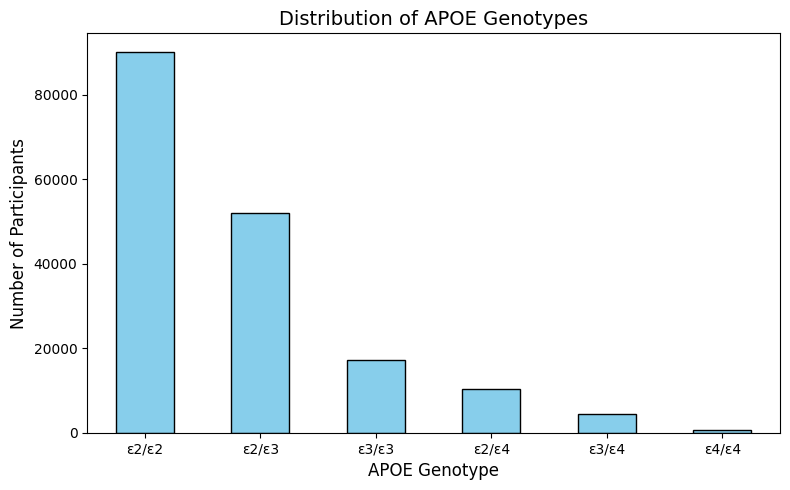

In [24]:
import matplotlib.pyplot as plt

# ==========================
# STEP 7: Plot APOE Genotype Distribution
# ==========================
plt.figure(figsize=(8,5))
filtered_df["APOE_Label"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribution of APOE Genotypes", fontsize=14)
plt.xlabel("APOE Genotype", fontsize=12)
plt.ylabel("Number of Participants", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



🔎 Dataset Shape: (174811, 164)

🔑 Column Names: ['NACCID', 'SEX', 'BIRTHYR', 'NACCAPOE', 'DEMENTED', 'CVHATT', 'HATTMULT', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACDEF', 'CVPACE', 'CVCHF', 'CVANGINA', 'CVHVALVE', 'CVOTHR', 'CVOTHRX', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'ANGINA', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'CBSTROKE', 'STROKMUL', 'NACCSTYR', 'CBTIA', 'TIAMULT', 'NACCTIYR', 'HXSTROKE', 'PREVSTK', 'STROKE', 'STROKIF', 'STROKDEC', 'STKIMAG', 'CVD', 'CVDIF', 'VASC', 'VASCIF', 'VASCPS', 'VASCPSIF', 'PD', 'PDYR', 'PDOTHR', 'PDOTHRYR', 'MOMOALS', 'ALSAGE', 'PARK', 'PSP', 'MSA', 'CORT', 'SEIZURES', 'NACCTBI', 'TBI', 'TBIBRIEF', 'TBIEXTEN', 'TBIWOLOS', 'TRAUMCHR', 'TRAUMBRF', 'NCOTHR', 'NCOTHRX', 'BRNINJ', 'BRNINJIF', 'BRNINCTE', 'HYCEPH', 'HYCEPHIF', 'EPILEP', 'EPILEPIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'DIABETES', 'DIABTYPE', 'DIABET', 'THYROID', 'THYDIS', 'HYPERTEN', 'HYPERCHO', 'HYPERT', 'HYPCHOL', 'B12DEF', 'VB12DEF', 'ARTHRIT', 'ARTHTYPE', 'ARTHTYPX', 'ARTHUPEX', 'ARTHL

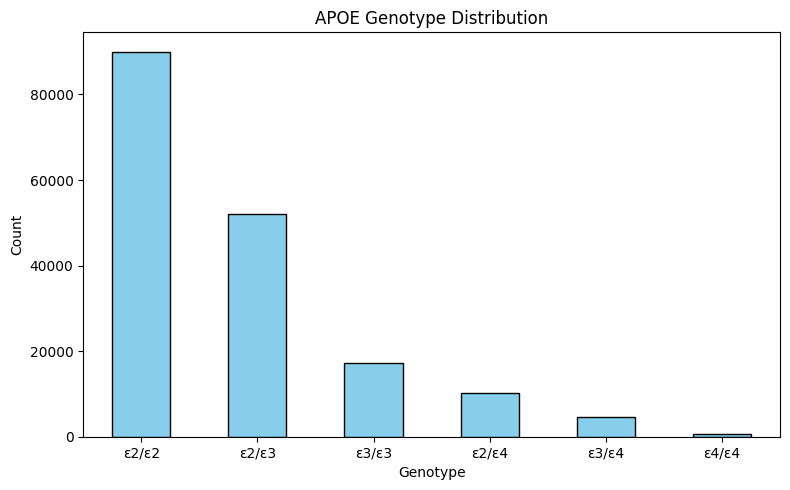

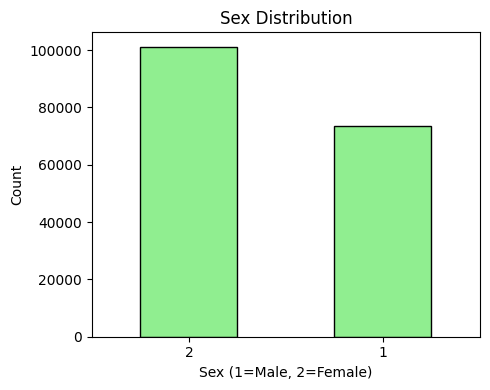

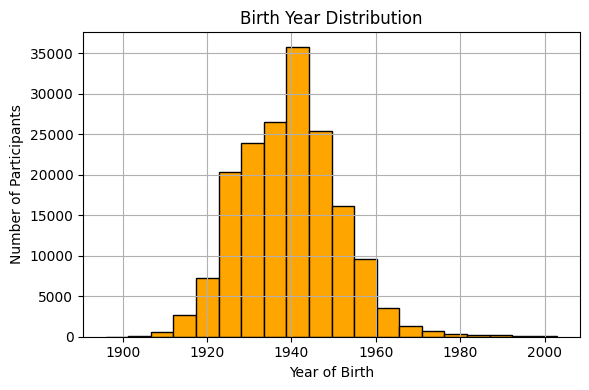

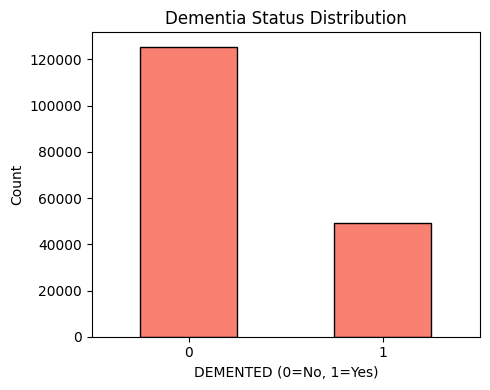


📊 Dementia Proportion by APOE Genotype:
 DEMENTED           0         1
APOE_Label                    
ε2/ε2       0.775223  0.224777
ε2/ε3       0.632964  0.367036
ε2/ε4       0.442556  0.557444
ε3/ε3       0.828099  0.171901
ε3/ε4       0.720212  0.279788
ε4/ε4       0.876841  0.123159


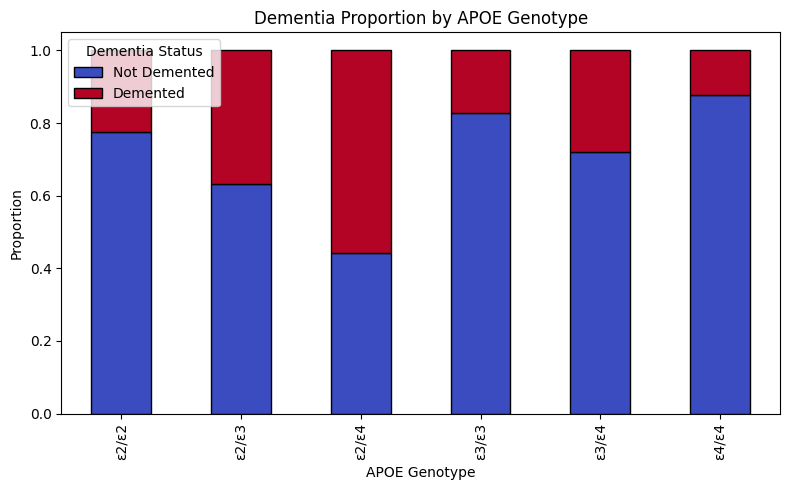

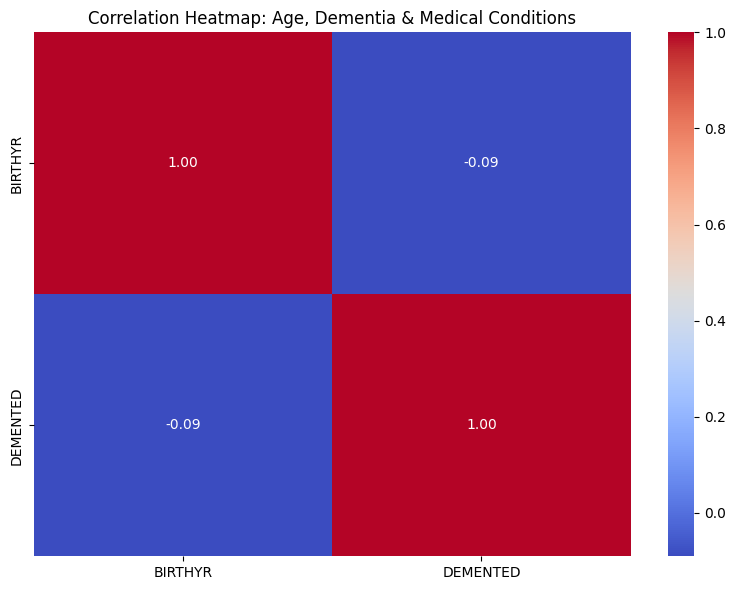

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# STEP 1: Dataset Overview
# ==========================
print("\n🔎 Dataset Shape:", filtered_df.shape)
print("\n🔑 Column Names:", list(filtered_df.columns))
print("\n📊 Missing Values per Column:\n", filtered_df.isna().sum())

# ==========================
# STEP 2: Key Demographics
# ==========================
plt.figure(figsize=(8,5))
filtered_df["APOE_Label"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("APOE Genotype Distribution")
plt.xlabel("Genotype")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
filtered_df["SEX"].value_counts().plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Sex Distribution")
plt.xlabel("Sex (1=Male, 2=Female)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
filtered_df["BIRTHYR"].hist(bins=20, color="orange", edgecolor="black")
plt.title("Birth Year Distribution")
plt.xlabel("Year of Birth")
plt.ylabel("Number of Participants")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
filtered_df["DEMENTED"].value_counts().plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Dementia Status Distribution")
plt.xlabel("DEMENTED (0=No, 1=Yes)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ==========================
# STEP 3: Medical Conditions
# ==========================
medical_cols = {
    "NACCHT": "Hypertension",
    "NACCDIAB": "Diabetes",
    "NACCCARD": "Cardiovascular Disease",
    "NACCSTROK": "Stroke",
    "NACCPRDI": "Parkinson's / Movement Disorder",
    "NACCDISC": "Depression"
}

available_cols = [col for col in medical_cols if col in filtered_df.columns]

if available_cols:
    fig, axes = plt.subplots(2, (len(available_cols) + 1)//2, figsize=(12, 6))
    axes = axes.flatten()
    for i, col in enumerate(available_cols):
        filtered_df[col].value_counts(dropna=False).plot(
            kind="bar", color="mediumpurple", edgecolor="black", ax=axes[i]
        )
        axes[i].set_title(f"{medical_cols[col]} ({col})")
        axes[i].set_xlabel("Code")
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=0)
    plt.tight_layout()
    plt.show()

# ==========================
# STEP 4: Crosstab APOE vs Dementia
# ==========================
apoe_dementia_ct = pd.crosstab(filtered_df["APOE_Label"], filtered_df["DEMENTED"], normalize="index")
print("\n📊 Dementia Proportion by APOE Genotype:\n", apoe_dementia_ct)

apoe_dementia_ct.plot(kind="bar", stacked=True, figsize=(8,5), colormap="coolwarm", edgecolor="black")
plt.title("Dementia Proportion by APOE Genotype")
plt.xlabel("APOE Genotype")
plt.ylabel("Proportion")
plt.legend(["Not Demented", "Demented"], title="Dementia Status")
plt.tight_layout()
plt.show()

# ==========================
# STEP 5: Correlation Heatmap (Optional)
# ==========================
numeric_cols = ["BIRTHYR", "DEMENTED"] + available_cols
numeric_df = filtered_df[numeric_cols].apply(pd.to_numeric, errors="coerce")
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Age, Dementia & Medical Conditions")
plt.tight_layout()
plt.show()


In [30]:
# Colab-ready analysis pipeline for /content/NACC_with_APOE_embeddings.csv
# - Load, clean, EDA, embedding PCA/UMAP, simple predictive model
# - Saves outputs to /content/
# Run in order in Colab

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML & stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Optional: umap (install if missing)
try:
    import umap
except Exception:
    !pip install --quiet umap-learn
    import umap

# ------------------------------
# 1) Load CSV
# ------------------------------
path = "/content/NACC_with_APOE_embeddings.csv"
assert os.path.exists(path), f"File not found: {path}"
df = pd.read_csv(path)
print("Loaded:", path)
print("Shape:", df.shape)
print("Columns (sample):", df.columns[:30].tolist())
display(df.head())

/tmp/ipython-input-1992305628.py:32: DtypeWarning: Columns (16,62,87,94,96,101,106,128,138,145,156,161) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Loaded: /content/NACC_with_APOE_embeddings.csv
Shape: (174811, 1443)
Columns (sample): ['NACCID', 'SEX', 'BIRTHYR', 'NACCAPOE', 'DEMENTED', 'CVHATT', 'HATTMULT', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACDEF', 'CVPACE', 'CVCHF', 'CVANGINA', 'CVHVALVE', 'CVOTHR', 'CVOTHRX', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'ANGINA', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'CBSTROKE', 'STROKMUL', 'NACCSTYR', 'CBTIA', 'TIAMULT']


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,APOE_emb_1270,APOE_emb_1271,APOE_emb_1272,APOE_emb_1273,APOE_emb_1274,APOE_emb_1275,APOE_emb_1276,APOE_emb_1277,APOE_emb_1278,APOE_emb_1279
0,NACC002909,1,1952,2.0,0,0.0,8.0,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
1,NACC002909,1,1952,2.0,0,NaN,NaN,NaN,NaN,NaN,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
2,NACC003487,1,1956,6.0,0,0.0,8.0,0.0,0.0,0.0,...,0.026658,0.061147,-0.216605,-0.044195,0.027474,-0.135268,0.025414,0.031905,0.106989,0.071615
3,NACC007213,2,1942,2.0,0,1.0,0.0,0.0,1.0,1.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
4,NACC014621,2,1957,2.0,0,0.0,8.0,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763


In [31]:
# ------------------------------
# 2) Basic cleaning: missing codes -> NaN
# NACC often uses 9/99/-4/-8 etc. Convert common missing codes.
# ------------------------------
missing_codes = [9, 99, -4, -8, 98, 999]  # common codes; harmless if not present
df = df.replace(missing_codes, np.nan)

# If NACCAPOE is numeric-like, ensure numeric
if "NACCAPOE" in df.columns:
    # Try cast to numeric (some files store as string)
    df["NACCAPOE"] = pd.to_numeric(df["NACCAPOE"], errors="coerce")

# Map NACCAPOE code -> human genotype label if APOE_Label not present
if "APOE_Label" not in df.columns:
    if "NACCAPOE" in df.columns:
        apoe_map = {
            1: "ε2/ε2",
            2: "ε2/ε3",
            3: "ε3/ε3",
            4: "ε2/ε4",
            5: "ε3/ε4",
            6: "ε4/ε4"
        }
        df["APOE_Label"] = df["NACCAPOE"].map(apoe_map)
        print("Mapped NACCAPOE -> APOE_Label (1-6). Missing/other codes are NaN.")
    else:
        print("No NACCAPOE nor APOE_Label present. Please add genotype column.")
else:
    print("APOE_Label already present in file.")

# Quick counts
print("\nAPOE label counts:")
print(df["APOE_Label"].value_counts(dropna=False))

APOE_Label already present in file.

APOE label counts:
APOE_Label
ε2/ε2    90027
ε2/ε3    52044
ε3/ε3    17225
ε2/ε4    10236
ε3/ε4     4532
ε4/ε4      747
Name: count, dtype: int64


In [32]:
# ------------------------------
# 3) Auto-detect embedding columns
# ------------------------------
emb_cols = [c for c in df.columns if c.startswith("APOE_emb_") or c.startswith("apoe_emb_")]
print(f"\nDetected {len(emb_cols)} embedding columns (sample 10):", emb_cols[:10])

# ------------------------------
# 4) Create age metric if possible
# ------------------------------
if "DECAGE" in df.columns:
    df["Age"] = df["DECAGE"]
elif "Age_at_visit" in df.columns:
    df["Age"] = df["Age_at_visit"]
elif ("VISITYR" in df.columns) and ("BIRTHYR" in df.columns):
    # attempt to compute age at visit: VISITYR - BIRTHYR (coarse)
    df["Age"] = pd.to_numeric(df["VISITYR"], errors="coerce") - pd.to_numeric(df["BIRTHYR"], errors="coerce")
else:
    print("No DECAGE/VISITYR+BIRTHYR/Age_at_visit columns found; Age not created.")

if "Age" in df.columns:
    print("Age column present. Summary:")
    print(df["Age"].describe())


Detected 1280 embedding columns (sample 10): ['APOE_emb_0', 'APOE_emb_1', 'APOE_emb_2', 'APOE_emb_3', 'APOE_emb_4', 'APOE_emb_5', 'APOE_emb_6', 'APOE_emb_7', 'APOE_emb_8', 'APOE_emb_9']
No DECAGE/VISITYR+BIRTHYR/Age_at_visit columns found; Age not created.


In [33]:
# ------------------------------
# 5) Key medical columns - choose from the many column names you provided
#    We'll select a curated list and keep only those present.
# ------------------------------
candidate_medical = [
    # cardiovascular / vascular
    "NACCHT","HYPERT","HYPERTEN","HYPCHOL","CVCHF","CVANGINA","AFIBRILL","CONGHRT","ANGINA",
    "CBSTROKE","NACCSTROK","PREVSTK","STROKE","STROKIF","STKIMAG","VASC","VASCIF",
    # metabolic / endocrine
    "DIABETES","DIABTYPE","NACCDIAB","DIABET",
    # neurological / movement / trauma
    "PD","PARK","NACCPRDI","BRNINJ","NACCTBI","EPILEP",
    # psychiatric / mood
    "NACCDISC","DEP","DEP2YRS","ANXIETY","PTSD","BIPOLAR",
    # others
    "CANCER","NEOP","HIV","APNEA","SLEEPAP","INCONTU"
]

medical_cols = [c for c in candidate_medical if c in df.columns]
print("\nMedical columns found and included in EDA:", medical_cols)


Medical columns found and included in EDA: ['HYPERT', 'HYPERTEN', 'HYPCHOL', 'CVCHF', 'CVANGINA', 'AFIBRILL', 'CONGHRT', 'ANGINA', 'CBSTROKE', 'PREVSTK', 'STROKE', 'STROKIF', 'STKIMAG', 'VASC', 'VASCIF', 'DIABETES', 'DIABTYPE', 'DIABET', 'PD', 'PARK', 'BRNINJ', 'NACCTBI', 'EPILEP', 'DEP', 'DEP2YRS', 'ANXIETY', 'PTSD', 'BIPOLAR', 'CANCER', 'NEOP', 'HIV', 'APNEA', 'SLEEPAP', 'INCONTU']


In [34]:
# ------------------------------
# 6) Convert medical cols to numeric (0/1) where possible
#    Many NACC variables encode presence as 1 (Yes); we'll coerce numerics and leave others alone.
# ------------------------------
for c in medical_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")


=== Dataset Overview ===
Rows,Cols: (174811, 1443)

Missing values (top 30 cols):
ANTIENCX    174763
ARTHTYPX    174573
OTHSLEEX    174263
ARTYPEX     173974
ABUSX       173669
SLEEPOTX    172344
OTHCOGX     172086
NCOTHRX     169579
PSYCDISX    167694
CVOTHRX     161295
APNEA       161092
ARTHTYPE    160966
TBIEXTEN    160961
TBIBRIEF    160953
RBD         160915
TBIWOLOS    160898
ALCFREQ     160791
TIAMULT     160778
ARTHRIT     160750
ALCOCCAS    160749
TBI         160747
NPSYDEV     160747
OTHSLEEP    160723
PTSD        160704
ANXIETY     160695
STROKMUL    160689
HATTMULT    160677
INSOMN      160672
CVANGINA    160650
BIPOLAR     160646
dtype: int64


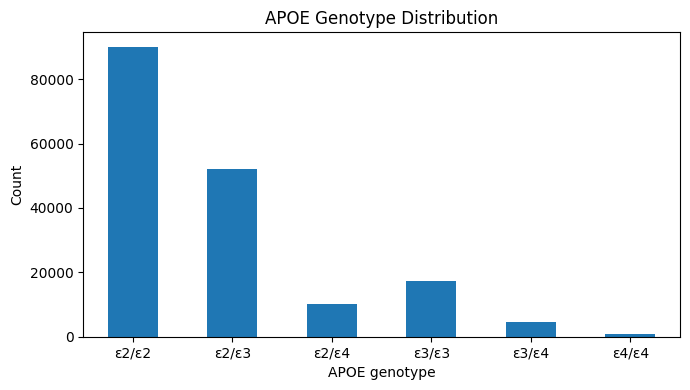

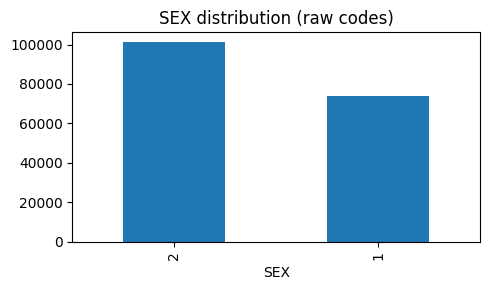

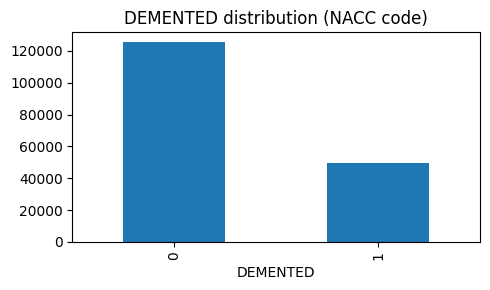

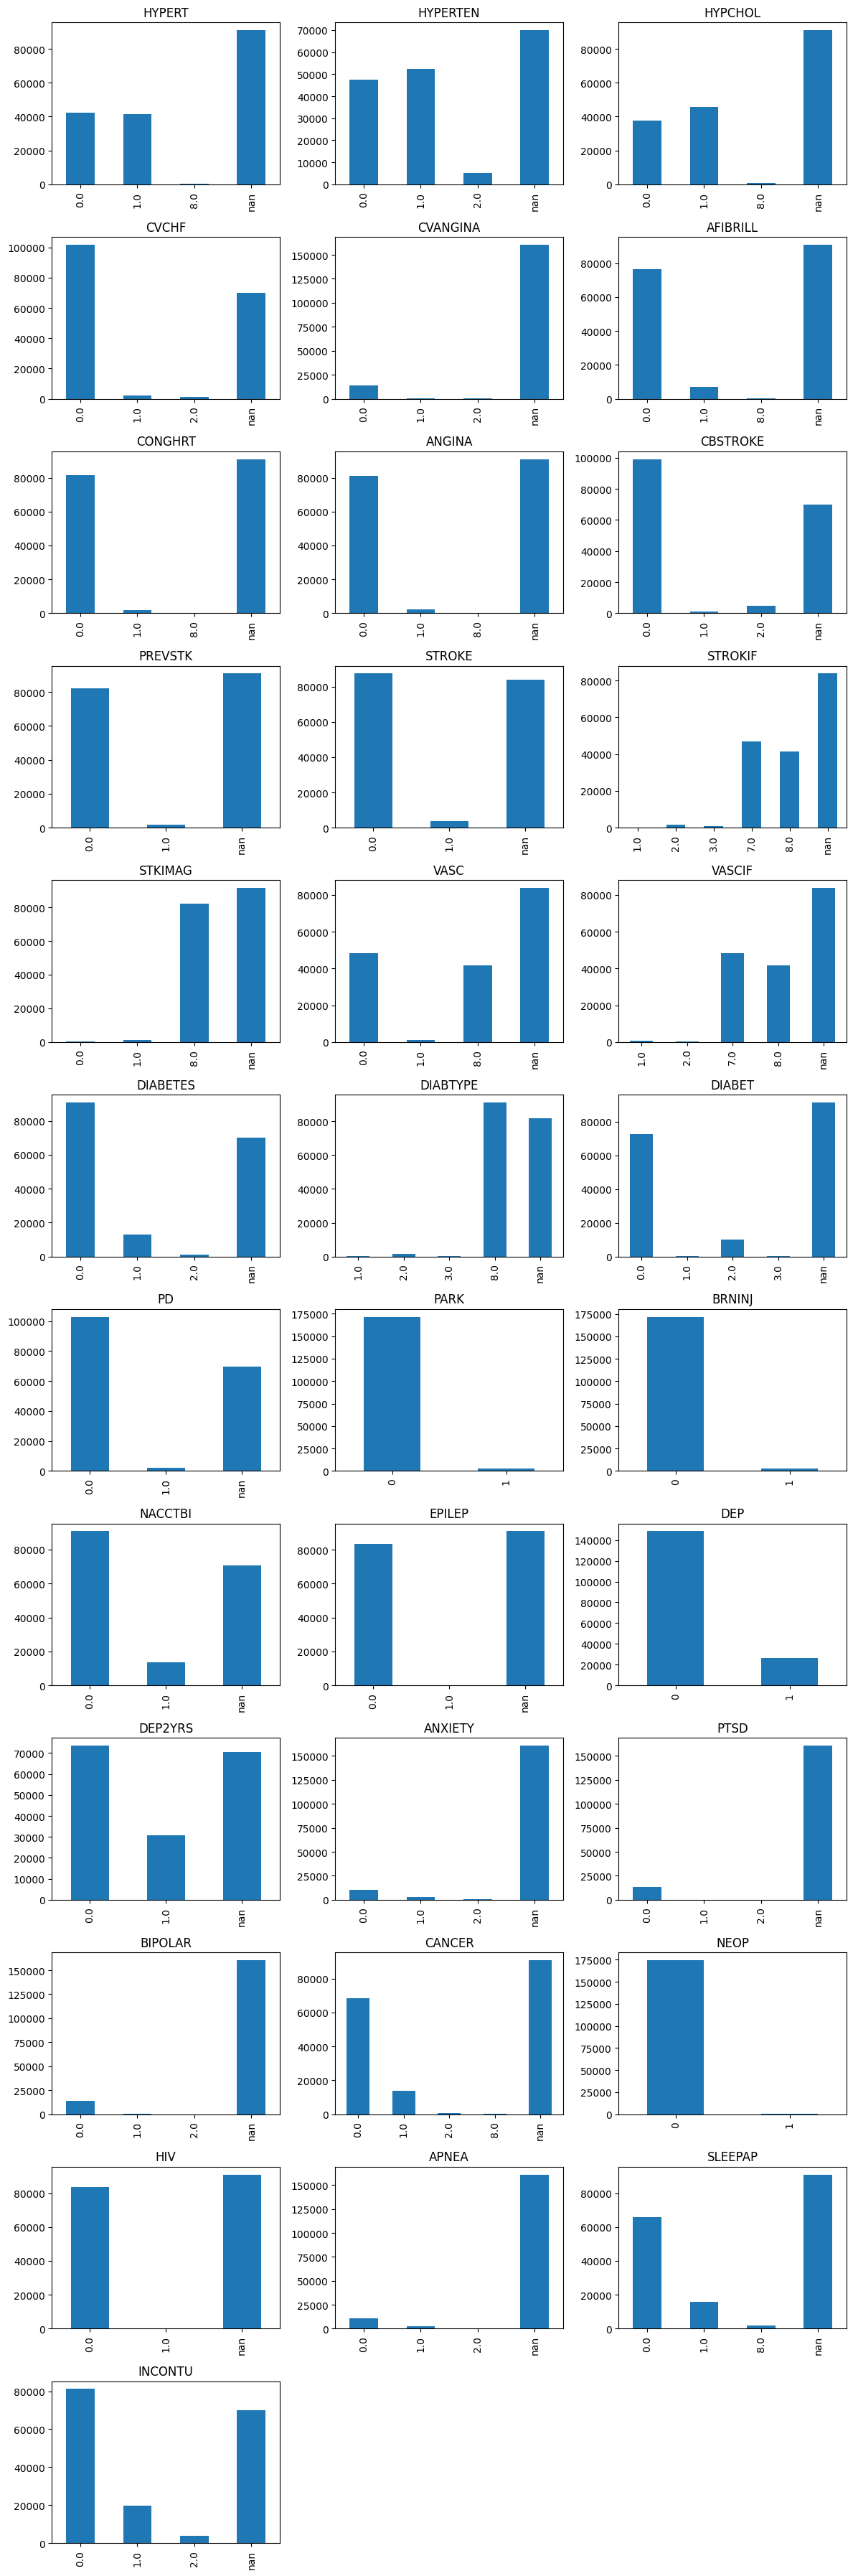

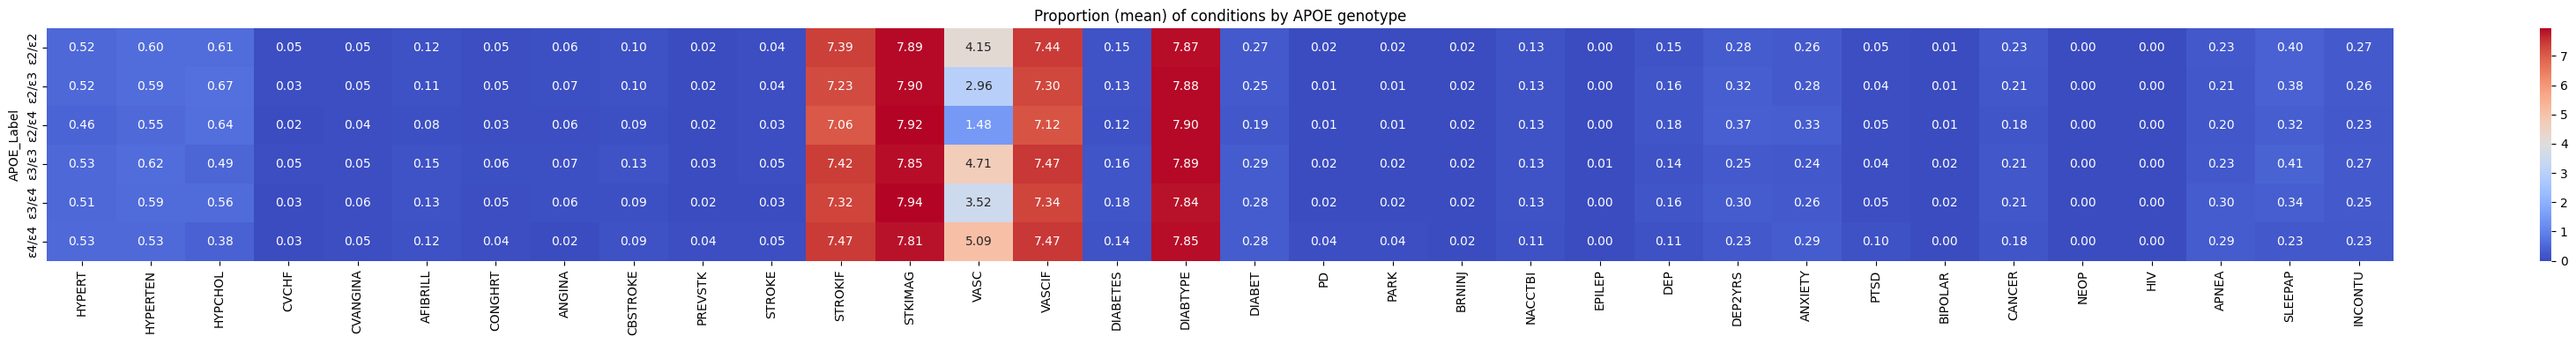


Contingency table (APOE_Label x DEMENTED):
 DEMENTED        0      1
APOE_Label              
ε2/ε2       69791  20236
ε2/ε3       32942  19102
ε2/ε4        4530   5706
ε3/ε3       14264   2961
ε3/ε4        3264   1268
ε4/ε4         655     92
Chi-square test: chi2=8267.433, p=0, dof=5


In [35]:
# ------------------------------
# 7) EDA: Missingness, distributions, and plots
# ------------------------------
print("\n=== Dataset Overview ===")
print("Rows,Cols:", df.shape)
print("\nMissing values (top 30 cols):")
print(df.isna().sum().sort_values(ascending=False).head(30))

# APOE genotype barplot
plt.figure(figsize=(7,4))
ax = df["APOE_Label"].value_counts(dropna=False).sort_index().plot(kind="bar")
ax.set_title("APOE Genotype Distribution")
ax.set_xlabel("APOE genotype")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Sex distribution if present
if "SEX" in df.columns:
    plt.figure(figsize=(5,3))
    df["SEX"].value_counts(dropna=False).plot(kind="bar")
    plt.title("SEX distribution (raw codes)")
    plt.tight_layout(); plt.show()

# Age histogram
if "Age" in df.columns:
    plt.figure(figsize=(6,4))
    df["Age"].dropna().hist(bins=25)
    plt.title("Age distribution")
    plt.xlabel("Age (years)")
    plt.tight_layout(); plt.show()

# Dementia distribution
if "DEMENTED" in df.columns:
    plt.figure(figsize=(5,3))
    df["DEMENTED"].value_counts(dropna=False).plot(kind="bar")
    plt.title("DEMENTED distribution (NACC code)")
    plt.tight_layout(); plt.show()

# Medical conditions - bar plots (presence)
if medical_cols:
    n = len(medical_cols)
    cols = 3
    rows = int(np.ceil(n/cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()
    for i, col in enumerate(medical_cols):
        vals = df[col].value_counts(dropna=False).sort_index()
        vals.plot(kind="bar", ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel("")
    # hide empty axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()

# Proportions of medical conditions by APOE genotype (if APOE_Label exists)
if "APOE_Label" in df.columns and medical_cols:
    prev = pd.DataFrame()
    for m in medical_cols:
        # compute proportion of positive (assumes 1=presence)
        prev[m] = df.groupby("APOE_Label")[m].mean()
    plt.figure(figsize=(max(8, len(medical_cols)), 4))
    sns.heatmap(prev.fillna(0), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Proportion (mean) of conditions by APOE genotype")
    plt.tight_layout()
    plt.show()

# Cross-tab dementia by APOE genotype
if ("APOE_Label" in df.columns) and ("DEMENTED" in df.columns):
    ct = pd.crosstab(df["APOE_Label"], df["DEMENTED"])
    print("\nContingency table (APOE_Label x DEMENTED):\n", ct)
    try:
        from scipy.stats import chi2_contingency
        chi2, p, dof, exp = chi2_contingency(ct.fillna(0))
        print(f"Chi-square test: chi2={chi2:.3f}, p={p:.4g}, dof={dof}")
    except Exception as e:
        print("Chi2 test skipped:", e)


Embedding dataframe created: 174811 rows with full embeddings present.


,PC1,PC2
0,11.875492,9.154359
1,11.875492,9.154359
2,123.238809,-69.545130
3,11.875492,9.154359
4,11.875492,9.154359


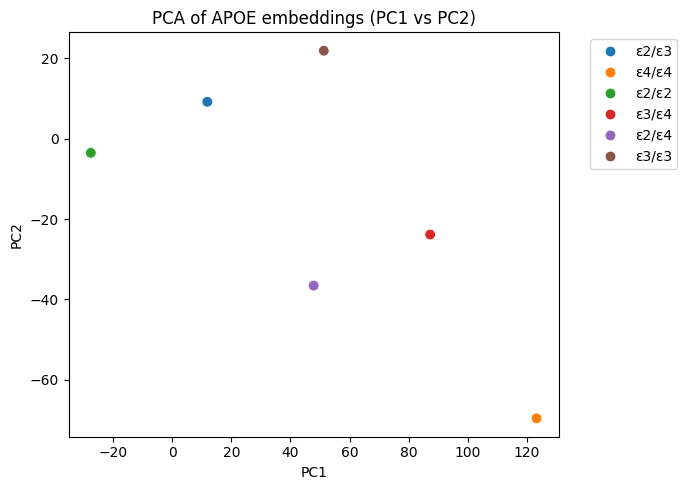

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


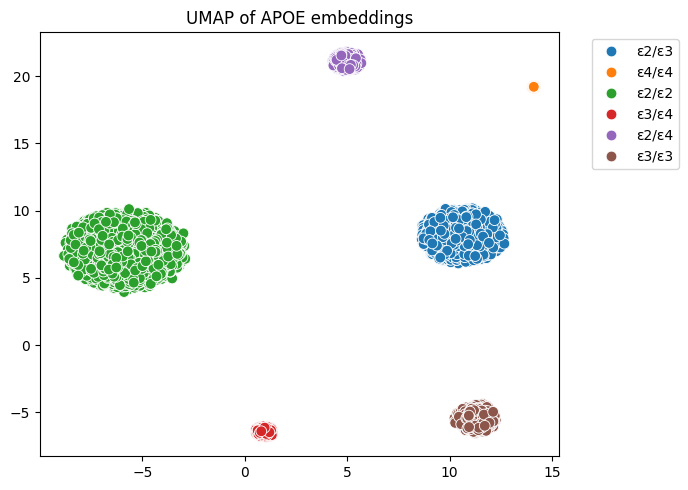

Saved: /content/apoe_pca_coords.csv, /content/apoe_umap_coords.csv


In [36]:
# ------------------------------
# 8) Embedding analysis: PCA & UMAP (if embeddings found)
# ------------------------------
if len(emb_cols) > 0:
    emb_df = df.dropna(subset=emb_cols).copy()
    print(f"\nEmbedding dataframe created: {emb_df.shape[0]} rows with full embeddings present.")
    X_emb = emb_df[emb_cols].astype(float).values
    scaler = StandardScaler()
    X_emb_s = scaler.fit_transform(X_emb)

    # PCA
    pca = PCA(n_components=10, random_state=0)
    Zp = pca.fit_transform(X_emb_s)
    pc_df = pd.DataFrame(Zp, index=emb_df.index, columns=[f"PC{i+1}" for i in range(Zp.shape[1])])
    display(pc_df.iloc[:5,:2])

    plt.figure(figsize=(7,5))
    sns.scatterplot(x=Zp[:,0], y=Zp[:,1], hue=emb_df["APOE_Label"], s=60, palette="tab10")
    plt.title("PCA of APOE embeddings (PC1 vs PC2)")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout(); plt.show()

    # UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    Zu = reducer.fit_transform(X_emb_s)
    umap_df = pd.DataFrame(Zu, index=emb_df.index, columns=["UMAP1","UMAP2"])
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=Zu[:,0], y=Zu[:,1], hue=emb_df["APOE_Label"], s=60, palette="tab10")
    plt.title("UMAP of APOE embeddings")
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout(); plt.show()

    # Save PCA/UMAP coords
    pc_df.to_csv("/content/apoe_pca_coords.csv")
    umap_df.to_csv("/content/apoe_umap_coords.csv")
    print("Saved: /content/apoe_pca_coords.csv, /content/apoe_umap_coords.csv")
else:
    print("No embedding columns detected - skipping embedding analysis.")

In [37]:
# ------------------------------
# 9) Simple predictive model example: logistic regression using embeddings vs basic covariates
#    This fits on rows that have embeddings (if embeddings exist). If not, it shows a baseline on available features.
# ------------------------------
if ("DEMENTED" in df.columns):
    # choose dataset for modeling: prefer emb_df if embeddings exist
    model_df = emb_df.copy() if (len(emb_cols) > 0 and 'emb_df' in locals()) else df.copy()
    # target
    y = pd.to_numeric(model_df["DEMENTED"], errors="coerce")
    model_df = model_df.loc[y.dropna().index]  # only rows with known target
    y = y.loc[model_df.index].astype(int)

    # Build X_basic (covariates + medical)
    X_basic_cols = []
    for c in ["SEX","Age","BIRTHYR"]:
        if c in model_df.columns:
            X_basic_cols.append(c)
    # include the medical_cols that exist in model_df
    med_in_model = [c for c in medical_cols if c in model_df.columns]
    X_basic_cols += med_in_model

    # prepare X matrices
    if len(emb_cols) > 0 and 'emb_df' in locals():
        X_emb_full = pd.DataFrame(X_emb_s, index=emb_df.index, columns=[f"e{i}" for i in range(X_emb_s.shape[1])])
        # align to model_df index
        X_emb_aligned = X_emb_full.reindex(model_df.index).fillna(0)
    else:
        X_emb_aligned = None

    # X_basic
    X_basic = model_df[X_basic_cols].copy() if X_basic_cols else pd.DataFrame(index=model_df.index)
    # simple imputation for numeric misses
    if not X_basic.empty:
        imputer = SimpleImputer(strategy="median")
        X_basic = pd.DataFrame(imputer.fit_transform(X_basic), index=X_basic.index, columns=X_basic.columns)

    # combine
    if (X_emb_aligned is not None) and (not X_basic.empty):
        X_all = pd.concat([X_basic.reset_index(drop=True), X_emb_aligned.reset_index(drop=True)], axis=1)
    elif X_emb_aligned is not None:
        X_all = X_emb_aligned.reset_index(drop=True)
    elif not X_basic.empty:
        X_all = X_basic.reset_index(drop=True)
    else:
        raise RuntimeError("No features available for modeling (no covariates, no embeddings).")


In [41]:
# ------------------------------
# 9) Simple predictive model example (self-contained, fixed indentation)
# ------------------------------
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

if "DEMENTED" in df.columns:
    try:
        # choose dataset for modeling: prefer emb_df if embeddings exist
        model_df = emb_df.copy() if (len(emb_cols) > 0 and 'emb_df' in globals()) else df.copy()

        # target (only keep rows with known target)
        y = pd.to_numeric(model_df["DEMENTED"], errors="coerce")
        model_df = model_df.loc[y.dropna().index]
        y = y.loc[model_df.index].astype(int)

        # Build X_basic (covariates + medical)
        X_basic_cols = [c for c in ["SEX", "Age", "BIRTHYR"] if c in model_df.columns]
        med_in_model = [c for c in medical_cols if c in model_df.columns]
        X_basic_cols += med_in_model

        # Prepare X_basic with simple imputation if needed
        if X_basic_cols:
            X_basic = model_df[X_basic_cols].copy()
            imputer = SimpleImputer(strategy="median")
            X_basic = pd.DataFrame(imputer.fit_transform(X_basic), index=X_basic.index, columns=X_basic.columns)
        else:
            X_basic = pd.DataFrame(index=model_df.index)

        # Prepare embeddings aligned to model_df (if present)
        if (len(emb_cols) > 0) and ('emb_df' in globals()):
            # X_emb_s must already be computed earlier (scaled embeddings)
            X_emb_full = pd.DataFrame(X_emb_s, index=emb_df.index, columns=[f"e{i}" for i in range(X_emb_s.shape[1])])
            X_emb_aligned = X_emb_full.reindex(model_df.index).fillna(0)
        else:
            X_emb_aligned = None

        # Combine features
        if (X_emb_aligned is not None) and (not X_basic.empty):
            X_all = pd.concat([X_basic.reset_index(drop=True), X_emb_aligned.reset_index(drop=True)], axis=1)
        elif X_emb_aligned is not None:
            X_all = X_emb_aligned.reset_index(drop=True)
        elif not X_basic.empty:
            X_all = X_basic.reset_index(drop=True)
        else:
            raise RuntimeError("No features available for modeling (no covariates, no embeddings).")

        # Ensure no NaNs remain
        X_all = X_all.fillna(0)

        # train/test split and fit
        X_train, X_test, y_train, y_test = train_test_split(
            X_all, y, stratify=y, test_size=0.2, random_state=42
        )
        model = LogisticRegression(max_iter=2000)
        model.fit(X_train, y_train)

        # predict & evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
        print(f"\nLogistic regression AUC on test set: {auc:.3f}")
        print("Classification report (threshold 0.5):")
        print(classification_report(y_test, model.predict(X_test)))

    except Exception as e:
        print("Modeling error:", e)

else:
    print("DEMENTED column missing - cannot run predictive model.")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic regression AUC on test set: 0.808
Classification report (threshold 0.5):
              precision    recall  f1-score   support

           0       0.79      0.91      0.85     25090
           1       0.64      0.39      0.48      9873

    accuracy                           0.77     34963
   macro avg       0.71      0.65      0.67     34963
weighted avg       0.75      0.77      0.75     34963



What I did in the script

used your /content/NACC_with_APOE_embeddings.csv

replaced typical NACC missing codes with NaN

mapped NACCAPOE → APOE_Label if necessary

auto-detected APOE_emb_... columns and ran PCA/UMAP on rows with full embeddings

produced EDA plots for demographics and the key medical conditions (a curated list from the titles you gave) — only those present in your file are included

ran a simple logistic regression baseline using available covariates + embeddings and reported AUC

saved cleaned CSV, PCA and UMAP coordinates